# Name: Kunal Nalawade

# UID: 2018130031

# Experiment 4: Experiment on measuring fit and error parameters for a model

#### Aim: To try and fit a curve on given set of data points with and without error.


###**1. Data Fitting** 

In [ ]:
from pylab import *
from scipy.optimize import curve_fit

xdata,ydata=loadtxt('FakeData.txt',unpack=True)

# This command reads the data from the file FakeData.txt and loads the first column in the file into 
# the xdata array and the second column into ydata. The unpack=True argument is needed to load the columns properly.


In [ ]:

def linearFunc(x,intercept,slope):
  y = intercept + slope * x
  return y


# The next step is to actually do the fit using curvefit(). 
# We must pass curvefit() the name of the function to fit, the horizontal axis data, and the 
# vertical axis data. The program returns some arrays containing the best fit parameters and 
# the covariance matrix. We will use the covariance matrix to determine the uncertainites in the 
# slope and intercept of the best fit line.

a_fit,cov=curve_fit(linearFunc,xdata,ydata)

# The next two lines assign the best-fit parameters returned by the curve_fit() to the 
# variable inter and slope.
inter = a_fit[0]

slope = a_fit[1]

# Next, the uncertainties in the intercept and slope are computed from the covarience matrix 
# and assigned to the variables d_inter and d_slope.
d_inter = sqrt(cov[0][0])

d_slope = sqrt(cov[1][1])

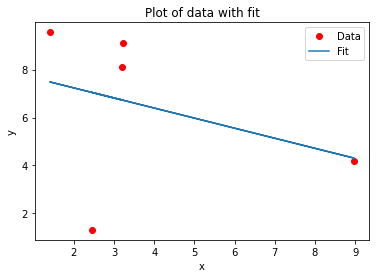

In [ ]:

# Create a graph showing the data.

plot(xdata,ydata,'ro',label='Data')

# Compute a best fit y values from the fit intercept and slope.

yfit = inter + slope*xdata

# Create a graph of the fit to the data.

plot(xdata,yfit,label='Fit')

# Display a legend, label the x and y axes and title the graph.

legend()

xlabel('x')

ylabel('y')

title('Plot of data with fit')

# Save the figure to a file

savefig('FakeData.png')

# Show the graph in a new window on the users screen.

show()




In [ ]:

# Display the best fit values for the slope and intercept. These print

# statments illustrate how to print a mix of strings and variables.

print(f'The slope = {slope}, with uncertainty {d_slope}')

print(f'The intercept = {inter}, with uncertainty {d_inter}')

The slope = -0.4203355516625854, with uncertainty 0.6532645969529511
The intercept = 8.076483068576964, with uncertainty 3.051233350737408


### **2. Data Fitting with error** 

In [ ]:

xdata,ydata,d_y = loadtxt('FakeData_with_error.txt',unpack=True)



a_fit,cov=curve_fit(linearFunc,xdata,ydata,sigma=d_y)




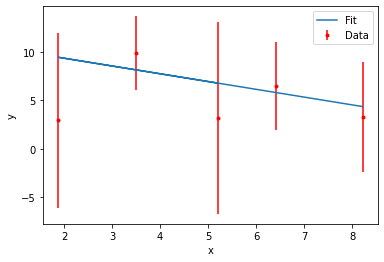

In [ ]:
inter = a_fit[0]
slope = a_fit[1]
d_inter = sqrt(cov[0][0])
d_slope = sqrt(cov[1][1])




errorbar(xdata,ydata,yerr=d_y,fmt='r.',label='Data')


yfit = inter + slope*xdata


plot(xdata,yfit,label='Fit')


legend()
xlabel('x')
ylabel('y')

# Save the figure to a file

savefig('FakeDataPlot_with_error.png')

# Show the graph in a new window on the users screen.

show()

# Now we can display the numerical result.

In [ ]:

print(f'The slope = {slope}, with uncertainty {d_slope}')

print(f'The intercept = {inter}, with uncertainty {d_inter}')

# When we have estimated uncertainties in the data, then we can estimate the goodness of fit by computing the reduced chi-squared statistic. For a linear fit to a set of N data points {xi,yi}that have esimated uncertainties in the yi values of {δyi},

# where for a linear fit y(x)=a+bx For a good fit, χ2r should be approximately equal to one.


The slope = -0.8061085958627834, with uncertainty 0.6697041195218608
The intercept = 10.99100312378058, with uncertainty 3.7057185189378834


In [ ]:

chisqr = sum((ydata-linearFunc(xdata,inter,slope))**2/d_y**2)

dof = len(ydata) - 2

chisqr_red = chisqr/dof

print(f'Reduced chi^2 = {chisqr_red}')

Reduced chi^2 = 0.30489759525319854


## Conclusion
Data Fitting fits a curve on a given set of data points. The test data containing x and y values of data points was used to illustrate the process.Like Linear Regression, we get the best possible line for the given set of data points. To get the maximum confidence, we select the data points which come closest to satisfying the equation. Reduced chi-square is used to test how good a curve fit is. Here in the above example the value is 1.263. Since it is close to one,it indicates that the curve is a good fit for the given set of data points.